In [1]:
# 통계의 힘 3세트 책 추천함 빅데이터 관심있으면
%pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 875.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 1.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [4]:
red_df =pd.read_csv("./winequality-red.csv", sep=";") #구분자가 세미콜론으로 되어있이 때문에 ;설정
white_df =pd.read_csv("./winequality-white.csv", sep=";")

In [5]:
print(red_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [6]:
red_df.insert(0, column='type', value='red') #컬럼을 하나 추가 
white_df.insert(0, column='type', value='white') #열을 하나 추가 열이름은 타입 밸류는 와인으로 이름 설정

In [7]:
print(red_df)

     type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     red            7.4             0.700         0.00             1.9   
1     red            7.8             0.880         0.00             2.6   
2     red            7.8             0.760         0.04             2.3   
3     red           11.2             0.280         0.56             1.9   
4     red            7.4             0.700         0.00             1.9   
...   ...            ...               ...          ...             ...   
1594  red            6.2             0.600         0.08             2.0   
1595  red            5.9             0.550         0.10             2.2   
1596  red            6.3             0.510         0.13             2.3   
1597  red            5.9             0.645         0.12             2.0   
1598  red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076       

In [8]:
print(white_df)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0              0.27         0.36            20.7   
1     white            6.3              0.30         0.34             1.6   
2     white            8.1              0.28         0.40             6.9   
3     white            7.2              0.23         0.32             8.5   
4     white            7.2              0.23         0.32             8.5   
...     ...            ...               ...          ...             ...   
4893  white            6.2              0.21         0.29             1.6   
4894  white            6.6              0.32         0.36             8.0   
4895  white            6.5              0.24         0.19             1.2   
4896  white            5.5              0.29         0.30             1.1   
4897  white            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  

In [10]:
wine = pd.concat([red_df, white_df], ignore_index=True) #데이터 프레임 두 개를 합쳐주는 옶션 ignore_index를 사용하여 원래 있던 
#인덱스를 무시해서 만들어라. 이것을 안쓰면 원래 데이터 갯수로 인덱스를 먹음
print(wine)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0       red            7.4              0.70         0.00             1.9   
1       red            7.8              0.88         0.00             2.6   
2       red            7.8              0.76         0.04             2.3   
3       red           11.2              0.28         0.56             1.9   
4       red            7.4              0.70         0.00             1.9   
...     ...            ...               ...          ...             ...   
6492  white            6.2              0.21         0.29             1.6   
6493  white            6.6              0.32         0.36             8.0   
6494  white            6.5              0.24         0.19             1.2   
6495  white            5.5              0.29         0.30             1.1   
6496  white            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  

In [12]:
wine.describe() #같은 열에 대해서 평균 카운트 값들 등등 알아서 계산해줌 각각의 피쳐를 알아서 계산해줌

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [13]:
wine.quality.unique() #와인의 퀄리티값을 예측을 하고 싶기 때문에 유니크 등급은 몇개가 있는지 확인

array([5, 6, 7, 4, 8, 3, 9])

In [14]:
wine.quality.value_counts() #각각의 유니크 별로 값이 몇개 있는지 확인

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [16]:
wine.groupby('type')['quality'].describe #그룹별로 타입을 묶어서 퀄리티에 대한 여러 정보들을 보여줌 

<bound method SeriesGroupBy.describe of <pandas.core.groupby.generic.SeriesGroupBy object at 0x14fb343d0>>

In [47]:
wine['type'] = wine['type'].replace('red',1)#각각의 와인을 1과 0으로 치환을 해줌
wine['type'] = wine['type'].replace('white',0)

In [48]:
print(wine)

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.4              0.70         0.00             1.9   
1        1            7.8              0.88         0.00             2.6   
2        1            7.8              0.76         0.04             2.3   
3        1           11.2              0.28         0.56             1.9   
4        1            7.4              0.70         0.00             1.9   
...    ...            ...               ...          ...             ...   
6492     0            6.2              0.21         0.29             1.6   
6493     0            6.6              0.32         0.36             8.0   
6494     0            6.5              0.24         0.19             1.2   
6495     0            5.5              0.29         0.30             1.1   
6496     0            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         

In [49]:
x = wine.drop(['quality'], axis=1) #퀄리티만 없앰 왜냐면 구하는 값이 퀄리티기 때문에
y = wine['quality'] #이게 기본형태 리그레션 말고도 형태가 전부 비슷함

In [50]:
print(x) #퀄리티 값만 빼고 출력

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.4              0.70         0.00             1.9   
1        1            7.8              0.88         0.00             2.6   
2        1            7.8              0.76         0.04             2.3   
3        1           11.2              0.28         0.56             1.9   
4        1            7.4              0.70         0.00             1.9   
...    ...            ...               ...          ...             ...   
6492     0            6.2              0.21         0.29             1.6   
6493     0            6.6              0.32         0.36             8.0   
6494     0            6.5              0.24         0.19             1.2   
6495     0            5.5              0.29         0.30             1.1   
6496     0            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         

In [51]:
print(y) #y에는 퀄리티값만 알고 있음

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64


In [52]:
from sklearn.model_selection import train_test_split

# Train : Test = 80 : 20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) #a무조건 해줘야되는! 실제 값과 테스트 값
#구분을 안해주면 테스트값이 전부 잘나오기 떄문에 구분을 해줘야됨

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#실제 학습 데이터

In [54]:
print(y_pred)

[5.5646382  5.76643956 6.60742907 ... 5.22094905 5.02545238 6.30828944]


가장 많이 사용하면 MAE 예측값와 실제값을 뺀 값의 절대값 0이 되지 않기 위해, 전부 더해 갯수대로 나눠 줌 오차가 작으면 작을수록 가깝게 예측하기 때문에 좋음
MSE을 사용해 오차값이 너무 작을 때 제곱을 통해서 오차값을 좀 더 정확하게 확인 할 수 있음

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
print(mae)

mse = mean_squared_error(y_test, y_pred)
print(mse)

0.5665921176831821
0.5345871474849421


In [56]:
corr = wine.corr()

In [57]:
%pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

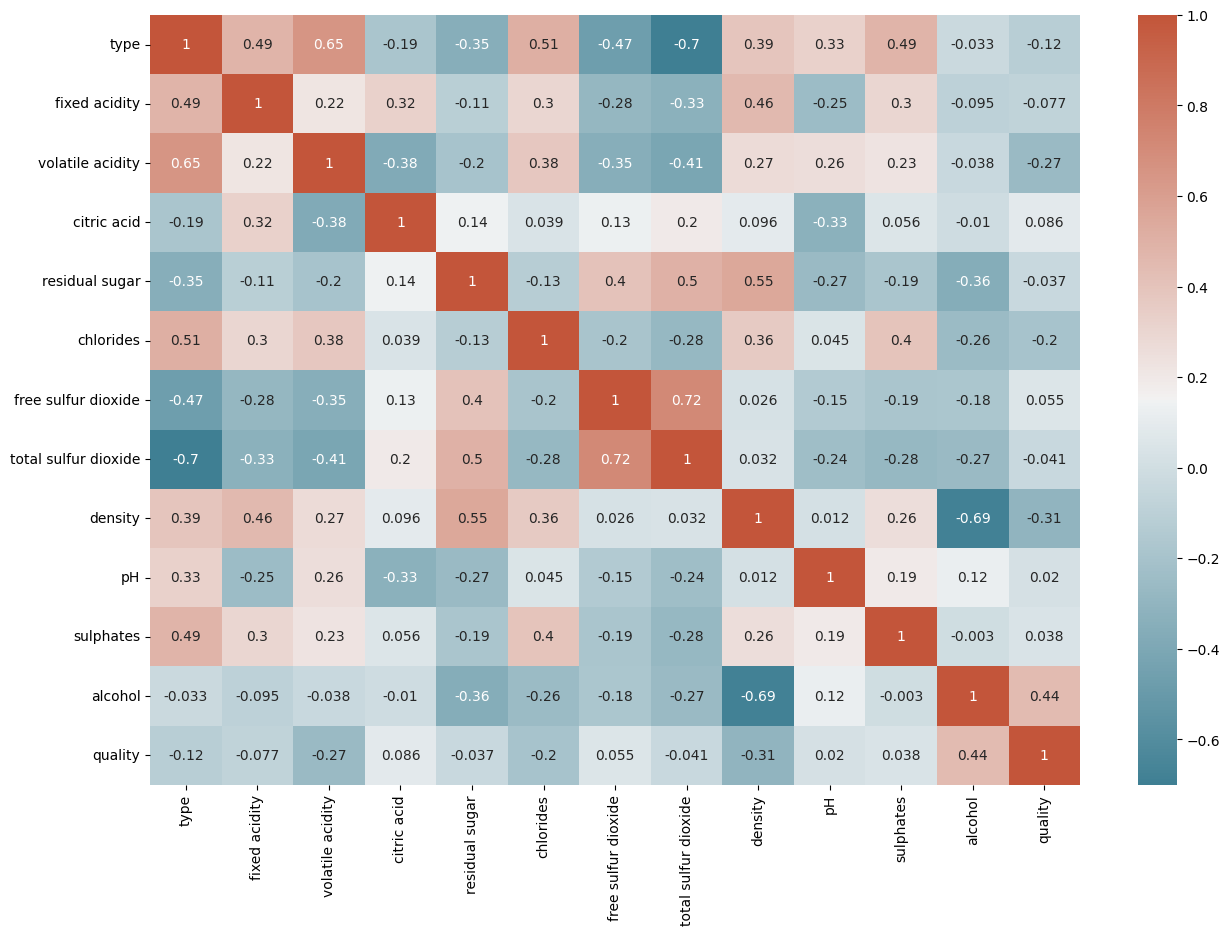

In [61]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap={True}))